# TP07 : Forêt aléatoire (Random forest)

Dans ce TP, notre but est d'examiner un problème parmi ceux des arbres de décision.
On essayera de régler ce problème avec paramétrage. 
Ensuite, on intoduira les forêts aléatoires.

Ce TP ne contient aucune partie "programmation". 
Vous devez seulement analyser les résultats obtenues (et apprendre bien sûr).

## I- Arbre de décision 

Ici, on reprend les arbres de décision pour indiquer un des problèmes qui peuvent se passer dans ce type d'apprentissage. 


### I-1- Préparation des données

Nous utilisons le dataset [Cars Data](https://www.kaggle.com/abineshkumark/carsdata) pour classer les voitures en trois classes : US., Euroupe. ou Japan. 

**Rien à analyser ici**

In [90]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline

# Lecture du dataset
cars_data = pd.read_csv('datasets/cars.csv', skipinitialspace=True)
# On a remarqué que le type de cette caractéristique n'est pas bien détecté
cars_data["cubicinches"] = pd.to_numeric(cars_data["cubicinches"])
# supprimer les valeurs absentes 
cars_data.dropna(inplace=True)
# Yay! We did it! Voici les premières lignes du dataset
cars_data.head()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
0,14.0,8,350.0,165,4209.0,12,1972,US.
1,31.9,4,89.0,71,1925.0,14,1980,Europe.
2,17.0,8,302.0,140,3449.0,11,1971,US.
3,15.0,8,400.0,150,3761.0,10,1971,US.
4,30.5,4,98.0,63,2051.0,17,1978,US.


In [91]:
#juste pour vérifier si tous les types sont numériques
cars_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 256 entries, 0 to 260
Data columns (total 8 columns):
mpg            256 non-null float64
cylinders      256 non-null int64
cubicinches    256 non-null float64
hp             256 non-null int64
weightlbs      256 non-null float64
time-to-60     256 non-null int64
year           256 non-null int64
brand          256 non-null object
dtypes: float64(3), int64(4), object(1)
memory usage: 18.0+ KB


In [92]:
# division en X et Y
X = cars_data.values[:, :-1]
Y = cars_data.values[:,-1]

Y[:10]

array(['US.', 'Europe.', 'US.', 'US.', 'US.', 'US.', 'US.', 'US.',
       'Europe.', 'Japan.'], dtype=object)

### I-2- Entraînement et test

Nous entraînons deux modèles des arbres de décision en utilisant [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) de scikit-learn : 
- *cart* : les paramètres par défaut de scikit-learn (Gini et 2 échantillons min dans une feuille)
- *cart7* : Gini, et nous avons fixé la profondeur max par 7

Ici, nous utilisons la métrique "accuracy" puisque dans le cas de classement multiclasses, accuracy = précision = rappel. Voir [ce blog](https://simonhessner.de/why-are-precision-recall-and-f1-score-equal-when-using-micro-averaging-in-a-multi-class-problem/) pour savoir pourquoi R=P dans le classement multinomial


In [93]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import timeit
from sklearn.metrics import accuracy_score

NBR_RUN = 7

temps_train = {
    "cart" : [],
    "cart7": []
}

conv = {# pour tester la convergence du modèle
    "cart" : [],
    "cart7": []
}


temps_test = {
    "cart" : [],
    "cart7": []
}


perf = {# pour tester la performance sur des données de test
    "cart": [],
    "cart7": []
    
}


for run in range(NBR_RUN): 
    # prétaitement des données
    X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3) # 30% données de test
    
    # ==================================
    # ENTRAINEMENT 
    # ==================================
    
    #entrainement CART
    cart = DecisionTreeClassifier() # un classifieur CART
    temps_debut = timeit.default_timer()
    cart.fit(X_train, Y_train)
    temps_train["cart"].append(timeit.default_timer() - temps_debut)
    
    #entrainement CART7
    cart7 = DecisionTreeClassifier(max_depth=7) # un classifieur CART avec profondeur max de 7
    temps_debut = timeit.default_timer()
    cart7.fit(X_train, Y_train)
    temps_train["cart7"].append(timeit.default_timer() - temps_debut)
    
    
    Y_cart_train = cart.predict(X_train)
    conv["cart"].append(accuracy_score(Y_train, Y_cart_train))
    Y_cart7_train = cart7.predict(X_train)
    conv["cart7"].append(accuracy_score(Y_train, Y_cart7_train))
    
    
    # ==================================
    # TEST 
    # ==================================
    
    #test CART
    temps_debut = timeit.default_timer()
    Y_cart_test = cart.predict(X_test)
    temps_test["cart"].append(timeit.default_timer() - temps_debut)
    
    #test CART7
    temps_debut = timeit.default_timer()
    Y_cart7_test = cart7.predict(X_test)
    temps_test["cart7"].append(timeit.default_timer() - temps_debut)
    
    perf["cart"].append(accuracy_score(Y_test, Y_cart_test))
    perf["cart7"].append(accuracy_score(Y_test, Y_cart7_test))
    
    
# Marche seulement sur sklearn 0.22; si vous utilisez Python < 3.5 probablement vous avez la version 0.20
# Voici la prondeur max des deux arbres (dernier RUN)
#cart.get_depth(), cart3.get_depth()

In [94]:
# ça c'est juste pour visualiser l'arbre CART (non limité par la profondeur)
# c'est un grand arbre
# vous n'avez pas besoin de ça dans l'analyse

#from sklearn.tree import export_graphviz
#from IPython.display import SVG, display
#from graphviz import Source

#graph = export_graphviz(cart, rounded = True, proportion = False, precision = 2, filled = True)
#graph = Source(graph)
#display(SVG(graph.pipe(format='svg')))


### I-3- Analyse de l'étape d'entrainement

**Analyser les résultats ci-après**
- Temps d'entrainement (min is better)
- Convergence du modèle. Je n'ai pas pu trouver une traduction exacte en français, donc : "how well the model fit the data." (max is better)

Ici, nous avons dessiné les métriques par rapport aux runs. 
L'ordre des runs n'est pas important.
Le plus important c'est que un modèle doit être stable par rapport un autre sur les différents runs, sinon il y a une problème quelque part.

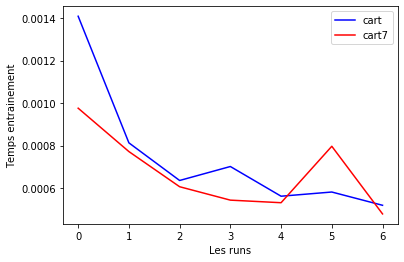

In [95]:
# Le temps d'entraînement 
#pd.DataFrame(temps_train)

plt.plot(range(NBR_RUN), temps_train["cart"], color="blue", label="cart")
plt.plot(range(NBR_RUN), temps_train["cart7"], color="red", label="cart7")
plt.ylabel("Temps entrainement")
plt.xlabel("Les runs")
plt.legend()
#plt.rcParams["figure.figsize"] = (3,7)
plt.show()

**Analyse du temps d'entrainement** <br>
- On remarque que l'algorithme CART7 donne de meilleurs résultats pour le temps d'entrainement que l'algorithme CART car limiter la profondeur de l'arbre empêche l'arbre de grandir ce qui signifie mois d'opérations à effectuer donc une diminution du temps d'entrainement.

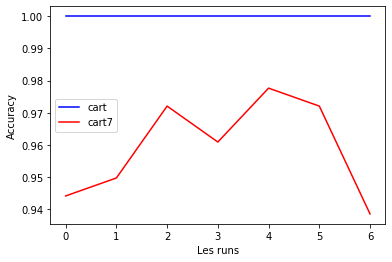

In [96]:
# La convergence
#pd.DataFrame(conv)

plt.plot(range(NBR_RUN), conv["cart"], color="blue", label="cart")
plt.plot(range(NBR_RUN), conv["cart7"], color="red", label="cart7")
plt.ylabel("Accuracy")
plt.xlabel("Les runs")
plt.legend()
#plt.rcParams["figure.figsize"] = (3,7)
plt.show()

**Analyse de la convergence**
- On remarque que l'algorithme CART donne une convergence idéale à 100% (l'arbre a des feuilles d'entropie nulle) ce qui n'est pas le cas pour l'algorithme CART7 car limiter la profondeur de l'arbre permet d'arrêter le processus de spplitting avant d'atteindre l'entropie optimale des feuilles.

### I-4- Analyse de l'étape de test

**Analyser les résultats ci-après**
- Temps de test 
- Performance sur des données de test

On veut savoir, aussi, si la meilleure convergence assure une meilleure classification dans le test. 
Si ce n'ai pas le cas, quel est le problème dans le cas du modèle "cart" ?

Ici, nous avons dessiné les métriques par rapport aux runs. 
L'ordre des runs n'est pas important.
Le plus important c'est qu'un modèle doit être stable par rapport un autre sur les différents runs

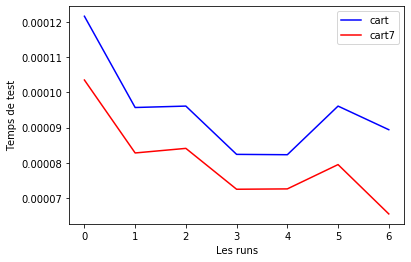

In [97]:
# Le temps de prédiction
#pd.DataFrame(temps_test)

plt.plot(range(NBR_RUN), temps_test["cart"], color="blue", label="cart")
plt.plot(range(NBR_RUN), temps_test["cart7"], color="red", label="cart7")
plt.ylabel("Temps de test")
plt.xlabel("Les runs")
plt.legend()
#plt.rcParams["figure.figsize"] = (3,7)
plt.show()

**Analyse du temps de test**
- On constate que l'algorithme CART7 donne un temps de test inférieur à celui de CART. Cela est dû au nombre réduit de nœuds à parcourir avant de décider de la classe de l'individu car CART7 limite la profondeur de l'arbre ce qui réduit le nombre de nœuds parcourus donc mois d'opérations à effectuer donc un temps d'exécution plus faible.

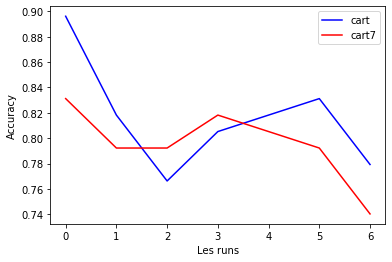

In [98]:
# La performance
#pd.DataFrame(perf)

plt.plot(range(NBR_RUN), perf["cart"], color="blue", label="cart")
plt.plot(range(NBR_RUN), perf["cart7"], color="red", label="cart7")
plt.ylabel("Accuracy")
plt.xlabel("Les runs")
plt.legend()
#plt.rcParams["figure.figsize"] = (3,7)
plt.show()

**Analyse de la performance**
- On remarque que malgré la vitesse de l'algorithme CART7 dans la construction de l'arbre et dans le temps d'exécution le modèle donne une faible précision par rapport à l'algorithme CART qui donne une meilleure précision. 


## II- Forêt aléatoire

Voici les étapes de base impliquées dans l'exécution de l'algorithme de forêt aléatoire:

- Choisissez N enregistrements aléatoires dans le jeu de données.
- Construisez un arbre de décision basé sur ces N enregistrements.
- Choisissez le nombre d'arbres souhaité dans votre algorithme et répétez les étapes 1 et 2.
- Le résultat :
   - En cas de régression, pour un nouvel enregistrement, chaque arbre de la forêt prédit une valeur pour Y (sortie). La valeur finale peut être calculée en prenant la moyenne de toutes les valeurs prédites par tous les arbres en forêt. 
   - En cas de classification, chaque arbre de la forêt prédit la catégorie à laquelle appartient le nouvel enregistrement. Enfin, le nouvel enregistrement est attribué à la catégorie qui remporte le vote à la majorité.


### II-1- Préparation des données

Nous utilisons le même dataset qu'avant 

### II-2- Entraînement et test

Nous entraînons deux modèles des arbres de décision avec [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) de scikit-learn : 
- *cart_2* : les paramètres par défaut de scikit-learn (Gini et 2 échantillons min dans une feuille)
- *cart7_2* : Gini par défaut, et nous avons fixé la profondeur max par 7

Aussi, nous utilisons [RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) pour entrainer un modèle : 
- *foret* : Gini par défaut, 100 arbres dans le forêt

En plus, on veut comparer les forêts avec d'autres algorithmes de classification. Les modèles sont les suivants : 
- *nb* : Naive Bayes. Le modèle est [GaussianNB](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html) destiné aux valeurs numériques
- *rl* : Régression logistique. Le modèle est [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) 


In [103]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB # pour les valeurs numériques
from sklearn.linear_model import LogisticRegression

NBR_RUN_2 = 7

temps_train_2 = {
    "cart_2" : [],
    "cart7_2": [],
    "nbayes": [],
    "reglog": [],
    "foret": []
}

conv_2 = {# pour tester la convergence du modèle
    "cart_2" : [],
    "cart7_2": [],
    "nbayes": [],
    "reglog": [],
    "foret": []
}


temps_test_2 = {
    "cart_2" : [],
    "cart7_2": [],
    "nbayes": [],
    "reglog": [],
    "foret": []
}


perf_2 = {# pour tester la performance sur des données de test
    "cart_2": [],
    "cart7_2": [],
    "nbayes": [],
    "reglog": [],
    "foret": []
}

# cette fonction utilise les variables globales ci-avant
def evaluer(nom_modele, modele, X_train, Y_train, X_test, Y_test):
    # temps entrainement
    temps_debut = timeit.default_timer()
    modele.fit(X_train, Y_train)
    temps_train_2[nom_modele].append(timeit.default_timer() - temps_debut)
    
    # converence
    Y_modele_train = modele.predict(X_train)
    conv_2[nom_modele].append(accuracy_score(Y_train, Y_modele_train))
    
    # temps de test
    temps_debut = timeit.default_timer()
    Y_modele_test = modele.predict(X_test)
    temps_test_2[nom_modele].append(timeit.default_timer() - temps_debut)
    
    # performance
    perf_2[nom_modele].append(accuracy_score(Y_test, Y_modele_test))
    

for run in range(NBR_RUN_2): 
    # prétaitement des données
    X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3) # 30% données de test
    
    cart_2 = DecisionTreeClassifier() # un classifieur CART
    evaluer("cart_2", cart_2, X_train, Y_train, X_test, Y_test)
    
    cart7_2 = DecisionTreeClassifier(max_depth=7) # un classifieur CART avec profondeur max de 7
    evaluer("cart7_2", cart7_2, X_train, Y_train, X_test, Y_test)
    
    nb = GaussianNB() # un classifieur Naive Bayes pour les caractéristiques numériques
    evaluer("nbayes", nb, X_train, Y_train, X_test, Y_test)
    
    rl = LogisticRegression(multi_class="multinomial", solver="lbfgs", max_iter=1000) # un classifieur de régression logistique
    evaluer("reglog", rl, X_train, Y_train, X_test, Y_test)
    
    foret = RandomForestClassifier(n_estimators=100, random_state=0) # un classifieur de foret avec 100 arbres
    evaluer("foret", foret, X_train, Y_train, X_test, Y_test)
    
print("FIN EVALUATION")
# Ignorer le warning. Par défaut nombre des itérations de la régression logistique est 100
# j'ai mis 1000 et le warning persiste

C:\Users\T480S\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\T480S\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\T480S\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\T480S\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\T480S\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", Convergenc

FIN EVALUATION


C:\Users\T480S\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


### II-3- Analyse de l'étape d'entraînement

**Analyser les résultats ci-après**
- Temps d'entraînement 
- Convergence du modèle.

On veut comparer les forêts avec les arbres. Aussi, on veut les comparer avec les autres algorithmes de classement.

Ici, nous avons dessiné les métriques par rapport aux runs. 
L'ordre des runs n'est pas important.
Le plus important c'est que un modèle doit être stable par rapport un autre sur les différents runs

In [104]:
# Le temps d'entraînement 
pd.DataFrame(temps_train_2)
# les temps d'entraînement des forêts et de régression logistique
# sont telement grands, on ne peut pas comparer entre les autres dans un graphique

#plt.plot(range(NBR_RUN_2), temps_train_2["cart_2"], color="blue", label="CART")
#plt.plot(range(NBR_RUN_2), temps_train_2["cart7_2"], color="red", label="CART (7)")
#plt.plot(range(NBR_RUN_2), temps_train_2["foret"], color="green", label="Foret")
#plt.plot(range(NBR_RUN_2), temps_train_2["nbayes"], color="cyan", label="Naive Bayes")
#plt.plot(range(NBR_RUN_2), temps_train_2["reglog"], color="magenta", label="Regression logistique")
#plt.ylabel("Temps entrainement")
#plt.xlabel("Les runs")
#plt.legend()
#plt.rcParams["figure.figsize"] = (3,7)
#plt.show()

,cart_2,cart7_2,nbayes,reglog,foret
0,0.000826,0.000496,0.000618,0.164132,0.054708
1,0.000473,0.000431,0.000543,0.154160,0.057728
2,0.000468,0.000471,0.000569,0.165082,0.050618
3,0.000445,0.000421,0.000673,0.153675,0.057661
4,0.000478,0.000433,0.000523,0.165560,0.051010
5,0.000466,0.000442,0.000533,0.156047,0.057943
6,0.000598,0.000518,0.000582,0.160261,0.051653


**Analyse du temps d'entraînement**
- On remarque que nous avons en première position les modèles avec les algorithmes CART, CART7 et Naive Bayes qui ont les temps d'entraînement les plus bas.
- En deuxième position, nous avons le modèle Random Forest avec un temps de d'entrainement environ 200 fois supérieur aux premiers algorithmes. car cela consiste à entraîner plusieurs arbres en même temps.
- La régression logistique vient en dernier avec le plus long temps de d'entrainement en raison de l'utilisation d'opérations très coûteuses. 

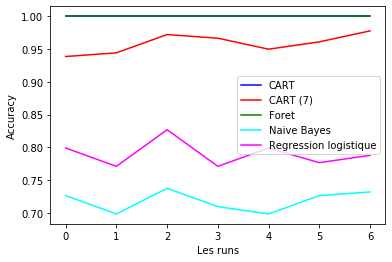

In [105]:
# La convergence
#pd.DataFrame(conv_2)

plt.plot(range(NBR_RUN_2), conv_2["cart_2"], color="blue", label="CART")
plt.plot(range(NBR_RUN_2), conv_2["cart7_2"], color="red", label="CART (7)")
plt.plot(range(NBR_RUN_2), conv_2["foret"], color="green", label="Foret")
plt.plot(range(NBR_RUN_2), conv_2["nbayes"], color="cyan", label="Naive Bayes")
plt.plot(range(NBR_RUN_2), conv_2["reglog"], color="magenta", label="Regression logistique")
plt.ylabel("Accuracy")
plt.xlabel("Les runs")
plt.legend()
plt.show()

**Analyse de la convergence** <br>
On constate une grande différence dans la convergence des modèles:
- en premiere position,nous avons les modeles de CART et Random Forest ont une précision parfaite dans les données d'entraînement. Cela se justifie par la construction d'arbres avec une entropie nulle au niveau des feuilles dans les deux modeles.Dans le cas d'une foret la majorité des arbres classent l'élement correctement.
- En deuxième position, nous avons l'algorithme CART7.Il a une accuracy moindre en raison de l'entropie non nulle au niveau de certaines feuilles car l'algorithme est conditionné par une profondeur maximale.
- La régression logistique vient en dernier ensuite le Naive Bayes. Ceci s'explique par le fait que les arbres font un surapprentissage  des données d'entrainement, contrairement à la regression logistique.

### II-4- Analyse de l'étape de test

**Analyser les résultats ci-après**
- Temps de test 
- Performance sur des données de test

On veut savoir si les forêts ont réglé le problème des arbres de décision. Aussi, on veut les comparer avec les autres algorithmes de classement.

Ici, nous avons dessiné les métriques par rapport aux runs. 
L'ordre des runs n'est pas important.
Le plus important c'est que un modèle doit être stable par rapport un autre sur les différents runs

In [106]:
# Le temps de prédiction
pd.DataFrame(temps_test_2)

,cart_2,cart7_2,nbayes,reglog,foret
0,0.000091,0.000080,0.000149,0.000127,0.004653
1,0.000069,0.000069,0.000141,0.000107,0.004967
2,0.000072,0.000071,0.000142,0.000076,0.004746
3,0.000071,0.000070,0.000140,0.000088,0.004726
4,0.000071,0.000070,0.000141,0.000069,0.004744
5,0.000074,0.000071,0.000142,0.000111,0.005179
6,0.000078,0.000076,0.000153,0.000120,0.004651


**Analyse du temps de test** <br>
- On remarque que les algorithmes CART, CART7 et la régression logistique ont des temps d'exécution,les plus petits, suivis de nbayes et enfin de forêt aléatoire. Les forêts aléatoires prennent beaucoup plus de temps car elles utilisent 100 arbres et comparent leurs résultats, contrairement aux algorithmes CART et CART2 qui sont basés sur un seul arbre.

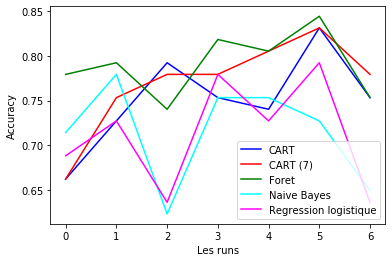

In [107]:
# La performance
#pd.DataFrame(perf_2)

plt.plot(range(NBR_RUN_2), perf_2["cart_2"], color="blue", label="CART")
plt.plot(range(NBR_RUN_2), perf_2["cart7_2"], color="red", label="CART (7)")
plt.plot(range(NBR_RUN_2), perf_2["foret"], color="green", label="Foret")
plt.plot(range(NBR_RUN_2), perf_2["nbayes"], color="cyan", label="Naive Bayes")
plt.plot(range(NBR_RUN_2), perf_2["reglog"], color="magenta", label="Regression logistique")
plt.ylabel("Accuracy")
plt.xlabel("Les runs")
plt.legend()
plt.show()

**Analyse de la performance**<br>
- On remarque que les algorithmes CART et Randrom Forest donnent la meilleure précision, cela s'explique par le sur-apprentissage généré par CART. Après nous avons l'algorithme CART7 qui vient en deuxième position car la réduction de la profondeur permet de perdre certaines informations donc une précision inférieure à CART. après en troisième position nous avons la régression logistique qui donne des résultats acceptables et enfin le modèle avec Naive Bayes donne les pires performances.

### II-5- Analyse de l'effet du nombre des arbres dans un forêt

Ici, le nombre des arbres dans le forêt est varié de 10 à 100 avec un pas de 5. 

**Analyser les résultats ci-après** 
- Temps d'entraînement par rapport au nombre des arbres
- La convergence par rapport au nombre des arbres
- Le temps de prédiction ar rapport au nombre des arbres
- La performance par rapport au nombre des arbres


In [108]:
# ICI, on ne va pas appliquer plusieurs RUNs
nbrs_arbres = range(10, 101, 5)

foret_nbr_temps_train = [] # le temps d'entraînement des forêts par rapport au nombre de leurs arbres
foret_nbr_conv = [] # la convergence des forêts par rapport au nombre de leurs arbres

foret_nbr_temps_test = [] # le temps de prédiction des forêts par rapport au nombre de leurs arbres
foret_nbr_perf = [] # la performance des forêts par rapport au nombre de leurs arbres


X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3) # 30% données de test

for nbr_arbres in nbrs_arbres: 
    foret_nbr = RandomForestClassifier(n_estimators=nbr_arbres, random_state=0) # créer un forêt avec le nombre des arbres
    
    # temps entrainement
    temps_debut = timeit.default_timer()
    foret_nbr.fit(X_train, Y_train)
    foret_nbr_temps_train.append(timeit.default_timer() - temps_debut)
    
    # converence
    Y_foret_nbr_train = foret_nbr.predict(X_train)
    foret_nbr_conv.append(accuracy_score(Y_train, Y_foret_nbr_train))
    
    # temps de test
    temps_debut = timeit.default_timer()
    foret_nbr_test = foret_nbr.predict(X_test)
    foret_nbr_temps_test.append(timeit.default_timer() - temps_debut)
    
    # performance
    foret_nbr_perf.append(accuracy_score(Y_test, foret_nbr_test))
    
print("FIN EVALUATION")

FIN EVALUATION


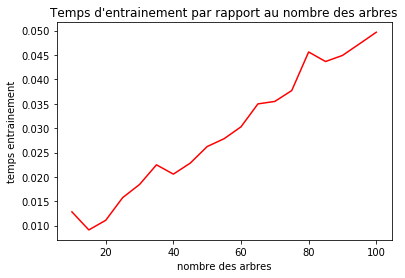

In [109]:

plt.plot(nbrs_arbres, foret_nbr_temps_train, color="red")
plt.ylabel("temps entrainement")
plt.xlabel("nombre des arbres")
plt.title("Temps d'entrainement par rapport au nombre des arbres")
plt.show()

**Analyse**
- On remarque que l'augmentation du nombre d'arbres entraine une augementation du temps d'entrainement.

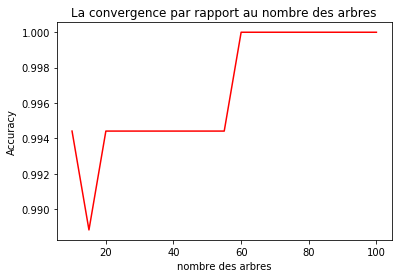

In [110]:
plt.plot(nbrs_arbres, foret_nbr_conv, color="red")
plt.ylabel("Accuracy")
plt.xlabel("nombre des arbres")
plt.title("La convergence par rapport au nombre des arbres")
plt.show()

**Analyse**
- On remarque que l'augmentation du nombre d'arbre augmente la precision (convergence).jusqu'à atteindre 1. au-delà de ce seuil, elle reste stable.

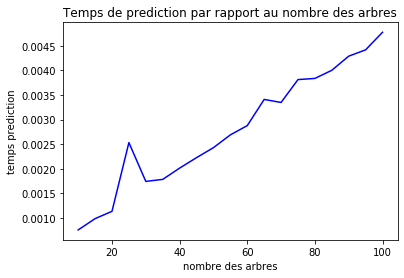

In [111]:
# Le temps de prédication
plt.plot(nbrs_arbres, foret_nbr_temps_test, color="blue")
plt.ylabel("temps prediction")
plt.xlabel("nombre des arbres")
plt.title("Temps de prediction par rapport au nombre des arbres")
plt.show()

**Analyse**
- On remarque que le temps de prédiciton augmente lorsque le nombre d'arbres augmente.

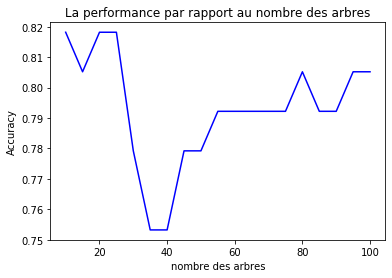

In [112]:
plt.plot(nbrs_arbres, foret_nbr_perf, color="blue")
plt.ylabel("Accuracy")
plt.xlabel("nombre des arbres")
plt.title("La performance par rapport au nombre des arbres")
plt.show()

**Analyse**
- On remarque que la performance augmente jusqu'à atteindre un seuil, au-delà duquel elle commence à diminuer.

### II-6- Analyse de l'effet de la profondeur max des arbres dans un forêt

Ici, la profondeur des arbres dans le foret est variée de 1 à 10 avec un pas de 1. 

**Analyser les résultats ci-après** 
- Temps d'entraînement par rapport au nombre des arbres
- La convergence par rapport au nombre des arbres
- Le temps de prédiction ar rapport au nombre des arbres
- La performance par rapport au nombre des arbres

In [113]:
# ICI, on ne va pas appliquer plusieurs RUNs
profs_arbres = range(1, 11)
print(profs_arbres)

foret_prof_temps_train = [] # le temps d'entraînement des forêts par rapport à la profondeur de leurs arbres
foret_prof_conv = [] # la convergence des forêts par rapport à la profondeur de leurs arbres

foret_prof_temps_test = [] # le temps de prédiction des forêts par rapport à la profondeur de leurs arbres
foret_prof_perf = [] # la performance des forêts par rapport à la profondeur de leurs arbres


X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3) # 30% données de test

for prof_arbres in profs_arbres: 
    foret_prof = RandomForestClassifier(n_estimators=40, random_state=0, max_depth=prof_arbres)
    
    # temps entrainement
    temps_debut = timeit.default_timer()
    foret_prof.fit(X_train, Y_train)
    foret_prof_temps_train.append(timeit.default_timer() - temps_debut)
    
    # converence
    Y_foret_prof_train = foret_prof.predict(X_train)
    foret_prof_conv.append(accuracy_score(Y_train, Y_foret_prof_train))
    
    # temps de test
    temps_debut = timeit.default_timer()
    foret_prof_test = foret_prof.predict(X_test)
    foret_prof_temps_test.append(timeit.default_timer() - temps_debut)
    
    # performance
    foret_prof_perf.append(accuracy_score(Y_test, foret_nbr_test))
    
print("FIN EVALUATION")

range(1, 11)
FIN EVALUATION


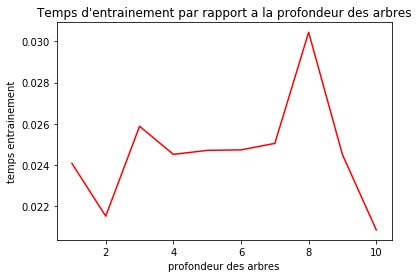

In [114]:
plt.plot(profs_arbres, foret_prof_temps_train, color="red")
plt.ylabel("temps entrainement")
plt.xlabel("profondeur des arbres")
plt.title("Temps d'entrainement par rapport a la profondeur des arbres")
plt.show()

**Analyse**
- On constate qu'un arbre plus profond nécessite un temps d'entrainement plus grand. 

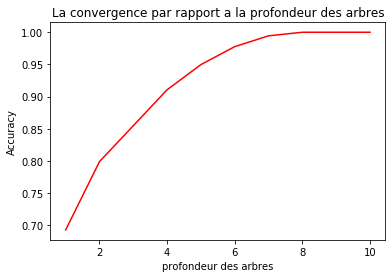

In [115]:
plt.plot(profs_arbres, foret_prof_conv, color="red")
plt.ylabel("Accuracy")
plt.xlabel("profondeur des arbres")
plt.title("La convergence par rapport a la profondeur des arbres")
plt.show()

**Analyse**
- On remarque que les arbres plus profond ont une meilleure convergence, jusqu'à atteindre la convergence maximale 1, au delà, il sera inutile d'augmenter la profondeur de l'arbre.

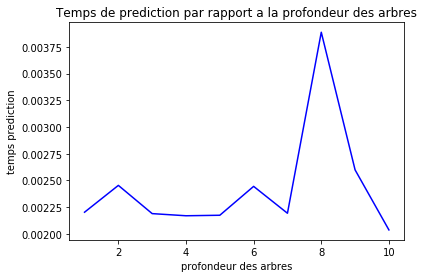

In [116]:
# Le temps de prédication
plt.plot(profs_arbres, foret_prof_temps_test, color="blue")
plt.ylabel("temps prediction")
plt.xlabel("profondeur des arbres")
plt.title("Temps de prediction par rapport a la profondeur des arbres")
plt.show()

**Analyse**
- On remarque que les arbres les plus profonds ont un temps de prediction plus élevé.

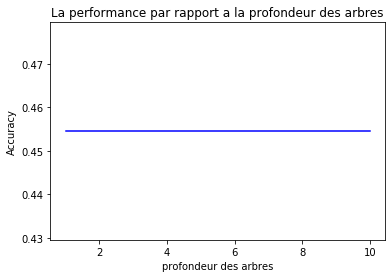

In [117]:
plt.plot(profs_arbres, foret_prof_perf, color="blue")
plt.ylabel("Accuracy")
plt.xlabel("profondeur des arbres")
plt.title("La performance par rapport a la profondeur des arbres")
plt.show()

**Analyse**
- On constate que la profondeur de l'arbre n'affecte pas les performances de Random Forest car nous prenons le résultat de la plupart des arbres donc il est inutile d'avoir des arbres complexes et profonds.

## III- Forêt aléatoire (Regression)

Dans la regression, les arbres de décision essayent de minimiser l'écart-type de chaque ensemble. Donc, le critère de diversité c'est l'écart-type (à la place de gini pour le classement). Dans scikit-learn, on utilise la mesure d'erreur MSE (mean squared error), qui est simulaire à la variance.

### III-1- Préparation des données

Nous utilisons le dataset [Medical Cost Personal Datasets: Insurance Forecast by using Linear Regression](https://www.kaggle.com/mirichoi0218/insurance). 



In [118]:
insurance = pd.read_csv('./datasets/insurance.csv') 
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [119]:
# Les arbres peuvent travailler avec des des caractéristiques nominales
# ces transformtions sont pour la regression linéaire
insurance2 = pd.get_dummies(insurance, prefix=["sex", "region"], columns = ["sex", "region"])
insurance2["smoker"] = np.array(insurance2["smoker"] == "yes").astype(int)
cols = insurance2.columns.tolist()
cols.insert(0, cols.pop(cols.index("charges")))
insurance2 = insurance2.reindex(columns= cols)

X_insurence2 = insurance2.iloc[:, 1:].values  
Y_insurence2 = insurance2.iloc[:, 0].values 


insurance2.head()

,charges,age,bmi,children,smoker,sex_female,sex_male,region_northeast,region_northwest,region_southeast,region_southwest
0,16884.92400,19,27.900,0,1,1,0,0,0,0,1
1,1725.55230,18,33.770,1,0,0,1,0,0,1,0
2,4449.46200,28,33.000,3,0,0,1,0,0,1,0
3,21984.47061,33,22.705,0,0,0,1,0,1,0,0
4,3866.85520,32,28.880,0,0,0,1,0,1,0,0


### III-2- Entraînement et test

Nous entraînons deux modèles des arbres de décision avec [DecisionTreeRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) de scikit-learn : 
- *cart_onehot* : les paramètres par défaut de scikit-learn (MSE et 2 échantillons min dans une feuille)
- *cart7_onehot* : MSE par défaut, et nous avons fixé la profondeur max par 7

Aussi, nous utilisons [RandomForestRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html) pour entrainer un modèle : 
- *foret_onehot* : MSE par défaut, 100 arbres dans le forêt

En plus, on veut comparer les forêts avec la regression linéaire : 
- *reglin_onehot* : Le modèle est [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)



In [120]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as MSE

NBR_RUN_3 = 7

temps_train_3 = {
    "cart_onehot" : [],
    "cart7_onehot": [],
    "foret_onehot": [],
    "reglin_onehot": []
}

conv_3 = {# pour tester la convergence du modèle
    "cart_onehot" : [],
    "cart7_onehot": [],
    "foret_onehot": [],
    "reglin_onehot": []
}


temps_test_3 = {
    "cart_onehot" : [],
    "cart7_onehot": [],
    "foret_onehot": [],
    "reglin_onehot": []
}


perf_3 = {# pour tester la performance sur des données de test
    "cart_onehot" : [],
    "cart7_onehot": [],
    "foret_onehot": [],
    "reglin_onehot": []
}


# cette fonction utilise les variables globales ci-avant
def evaluer2(nom_modele, modele, X_train, Y_train, X_test, Y_test):
    # temps entrainement
    temps_debut = timeit.default_timer()
    modele.fit(X_train, Y_train)
    temps_train_3[nom_modele].append(timeit.default_timer() - temps_debut)
    
    # converence
    Y_modele_train = modele.predict(X_train)
    conv_3[nom_modele].append(MSE(Y_train, Y_modele_train))
    
    # temps de test
    temps_debut = timeit.default_timer()
    Y_modele_test = modele.predict(X_test)
    temps_test_3[nom_modele].append(timeit.default_timer() - temps_debut)
    
    # performance
    perf_3[nom_modele].append(MSE(Y_test, Y_modele_test))
    
    

for run in range(NBR_RUN_3): 
    
    # données onehot
    X_train, X_test, Y_train, Y_test = train_test_split(X_insurence2, Y_insurence2, test_size=0.3)
    
    cart_3 = DecisionTreeRegressor() # un regresseur CART
    evaluer2("cart_onehot", cart_3, X_train, Y_train, X_test, Y_test)
    
    cart7_3 = DecisionTreeRegressor(max_depth=7) # un regresseur CART avec profondeur max de 7
    evaluer2("cart7_onehot", cart7_3, X_train, Y_train, X_test, Y_test)
    
    foret = RandomForestRegressor(n_estimators=100, random_state=0) # un regresseur de foret avec 100 arbres
    evaluer2("foret_onehot", foret, X_train, Y_train, X_test, Y_test)
    
    rl = LinearRegression() # un regresseur linéaire
    evaluer2("reglin_onehot", rl, X_train, Y_train, X_test, Y_test)
    
    
    
print("FIN EVALUATION")

FIN EVALUATION


### III-3- Analyse de l'étape d'entrainement

**Analyser les résultats ci-après**
- Temps d'entraînement (min is best)
- Le coût d'entraînement (min is best)

Ici, nous avons dessiné les métriques par rapport aux runs. 
L'ordre des runs n'est pas important.
Le plus important c'est que un modèle doit être stable par rapport un autre sur les différents runs


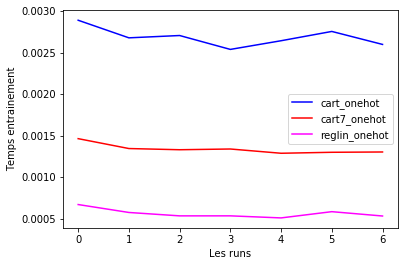

In [121]:
#pd.DataFrame(temps_train_3)

plt.plot(range(NBR_RUN_3), temps_train_3["cart_onehot"], color="blue", label="cart_onehot")
plt.plot(range(NBR_RUN_3), temps_train_3["cart7_onehot"], color="red", label="cart7_onehot")
# le temps d'entrainement des forets est telement grand, on ne peut pas comparer entre les autres
#plt.plot(range(NBR_RUN_3), temps_train_3["foret_onehot"], color="green", label="foret_onehot")
plt.plot(range(NBR_RUN_3), temps_train_3["reglin_onehot"], color="magenta", label="reglin_onehot")
plt.ylabel("Temps entrainement")
plt.xlabel("Les runs")
plt.legend()
#plt.rcParams["figure.figsize"] = (3,7)
plt.show()

**Analyse du temps d'entrainement**
- On remarque que l'algorithe CART a le plus grand temps d'entrainement, suivi de CART7 et enfin la regression linéaire. Ceci s'explique par le nombre d'opérations à effectuer pour chaque algorithme.
- On constate que le temps d'entrainement de Random forest est beaucoup plus important que celui des autres algorithmes cela est du à entrainement de plusieurs arbres.


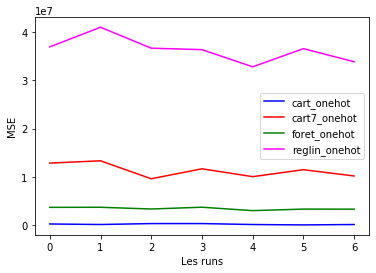

In [122]:
# Le coût d'entraînement
#pd.DataFrame(conv_3)

plt.plot(range(NBR_RUN_3), conv_3["cart_onehot"], color="blue", label="cart_onehot")
plt.plot(range(NBR_RUN_3), conv_3["cart7_onehot"], color="red", label="cart7_onehot")
plt.plot(range(NBR_RUN_3), conv_3["foret_onehot"], color="green", label="foret_onehot")
plt.plot(range(NBR_RUN_3), conv_3["reglin_onehot"], color="magenta", label="reglin_onehot")
plt.ylabel("MSE")
plt.xlabel("Les runs")
plt.legend()
#plt.rcParams["figure.figsize"] = (3,7)
plt.show()

**Analyse du cout d'entrainement**
- On a en premiere position l'algorithme CART avec un cout nul pour les données de test, car il a une entropie nulle au niveau des feuilles.
- En deuxieme position on a le Random forest avec un cout plus important,suivi de CART7. Random forest arrive a mieux connaitre les données.
- En deriner la regression linéaire qui est la moins efficace dans ces conditions.

### III-4- Analyse de l'étape de test

**Analyser les résultats ci-après**
- Temps de test 
- Le coût de test (l'erreur en utilisant MSE)

Ici, nous avons dessiné les métriques par rapport aux runs. 
L'ordre des runs n'est pas important.
Le plus important c'est que un modèle doit être stable par rapport un autre sur les différents runs

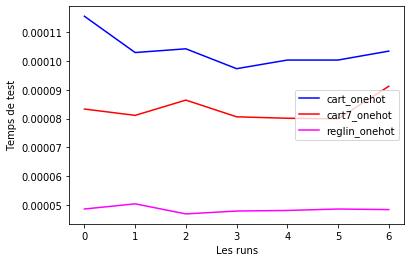

In [123]:
# Le temps de test 
# pd.DataFrame(temps_test_3)

plt.plot(range(NBR_RUN_3), temps_test_3["cart_onehot"], color="blue", label="cart_onehot")
plt.plot(range(NBR_RUN_3), temps_test_3["cart7_onehot"], color="red", label="cart7_onehot")
# le temps de test des forets est telement grand, on ne peut pas comparer entre les autres
#plt.plot(range(NBR_RUN_3), temps_test_3["foret_onehot"], color="green", label="foret_onehot")
plt.plot(range(NBR_RUN_3), temps_test_3["reglin_onehot"], color="magenta", label="reglin_onehot")
plt.ylabel("Temps de test")
plt.xlabel("Les runs")
plt.legend()
#plt.rcParams["figure.figsize"] = (3,7)
plt.show()

**Analyse du temps de test**
- On remarque que Le temps de test de CART est le plus grand, suivi de CART7 et enfin la regression linéaire. Ceci s'explique par le nombre d'opérations à effectuer pour chaque algorithme.
- On remarque aussi que le temps de test de Random forest est beaucoup plus important que celui des autres algorithmes car ça consiste à tester plusieurs arbres avant de prendre une décision.

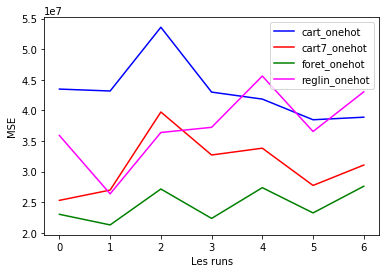

In [124]:
# Le cout de test
#pd.DataFrame(perf_3)

plt.plot(range(NBR_RUN_3), perf_3["cart_onehot"], color="blue", label="cart_onehot")
plt.plot(range(NBR_RUN_3), perf_3["cart7_onehot"], color="red", label="cart7_onehot")
plt.plot(range(NBR_RUN_3), perf_3["foret_onehot"], color="green", label="foret_onehot")
plt.plot(range(NBR_RUN_3), perf_3["reglin_onehot"], color="magenta", label="reglin_onehot")
plt.ylabel("MSE")
plt.xlabel("Les runs")
plt.legend()
#plt.rcParams["figure.figsize"] = (3,7)
plt.show()

**Analyse du cout de test**
- On constate que l'algorithmes Random forest est le plus efficace car il presente le cout e moins élevé.Suivi de regression lineaire et la CART7.Ceci est du à la capacité de ces algorithmes à ne pas avoir un sur-apprentissage sur les données de tests, contrairement à CART qui donne les pires résultats.